In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import concurrent.futures
from itertools import repeat


data_path = r"C:\Work\pic_data"
data_path

'C:\\Work\\pic_data'

In [6]:
def read_file(filename, skip):
    angle = int(os.path.basename(filename).split("_")[1])
    with open(filename, 'r') as f:
        output = []

        for i, line in enumerate(f):

            if i % skip == 0:
                x, y, z, time , _ = line.strip().split()

                output.append([float(x), float(y), float(z), float(time)])

    return angle, np.array(output)

In [16]:

def save_file(a:int):
    file = f"trace_{a}_11"
    try:
        angle, data = read_file(os.path.join(data_path, file), 10)
    except Exception as e:
        print(e)
        print(f'reading {file} failed')
        return


    r = 50000
    _r = r + r / 5

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    ax.set_xlim([-1 * _r, _r])
    ax.set_ylim([-1 * _r, _r])
    ax.set_zlim([-1 * _r, _r])

    ax.plot(data[:, 0], data[:, 1], data[:, 2])

    u, v = np.mgrid[0:2 * np.pi:40j, 0:np.pi:40j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_surface(x, y, z, color='green', alpha=0.15)

    ax.scatter(0, 0, 0, color='red', linewidths=2)

    ax.set_title(f"Угол {angle}", fontsize=16)
    ax.set_xlabel("X, см", fontsize=16)
    ax.set_ylabel("Y, см", fontsize=16)
    ax.set_zlabel("Z, см", fontsize=16)


    fig_2d = plt.figure(figsize=(8,8))
    ax_2d = fig_2d.add_subplot(111)

    ax_2d.set_xlim([-1 * _r, _r])
    ax_2d.set_ylim([-1 * 100000, 100000])


    circle = plt.Circle((0, 0), r, color='green', alpha=0.25)
    ax_2d.add_patch(circle)

    ax_2d.set_title(f"Угол {angle}", fontsize=16)
    ax_2d.plot(data[:, 0], data[:, 2])
    ax_2d.scatter(0, 0, color='red', linewidths=3)
    ax_2d.set_xlabel("X, см", fontsize=16)
    ax_2d.set_ylabel("Z, см", fontsize=16)


    ax_2d.grid()

    plt.tight_layout()
    plt.tight_layout()

    fig.savefig(f"pictures/angle_{angle}_3d.png")
    fig_2d.savefig(f"pictures/angle_{angle}_2d.png")

    plt.close()
    plt.close()



angle 0 saved
angle 10 saved
angle 15 saved
angle 20 saved
angle 25 saved
angle 27 saved
angle 30 saved
angle 34 saved
angle 35 saved
angle 40 saved


C:\Users\Admin\anaconda3\envs\jupyter\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


angle 41 saved
angle 42 saved
angle 44 saved
angle 46 saved
angle 48 saved
angle 49 saved
angle 50 saved
angle 51 saved
angle 52 saved
angle 53 saved
angle 54 saved
angle 55 saved
angle 56 saved
not enough values to unpack (expected 5, got 2)
reading trace_58_11 failed
angle 58 saved
angle 5 saved
angle 62 saved
angle 70 saved
angle 90 saved


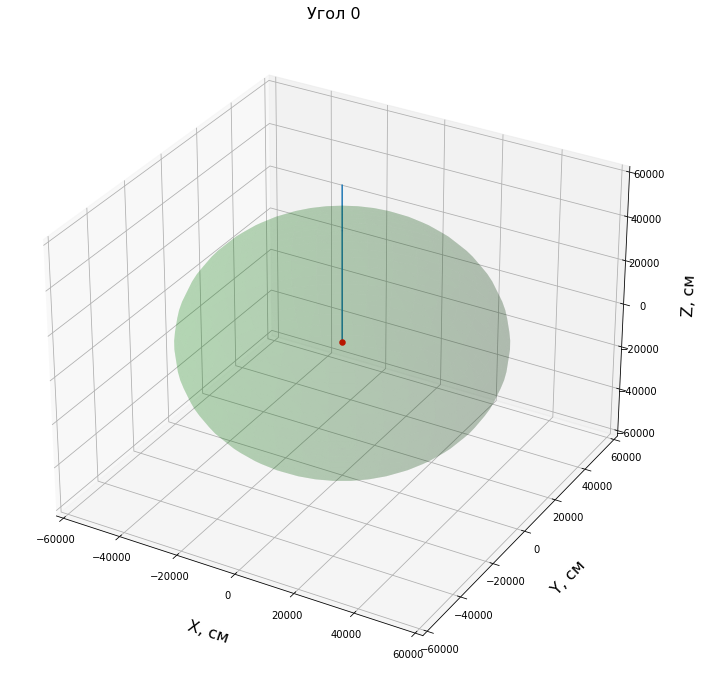

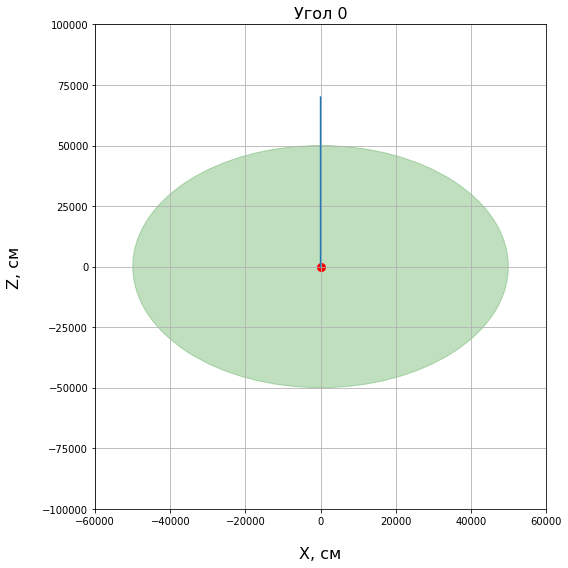

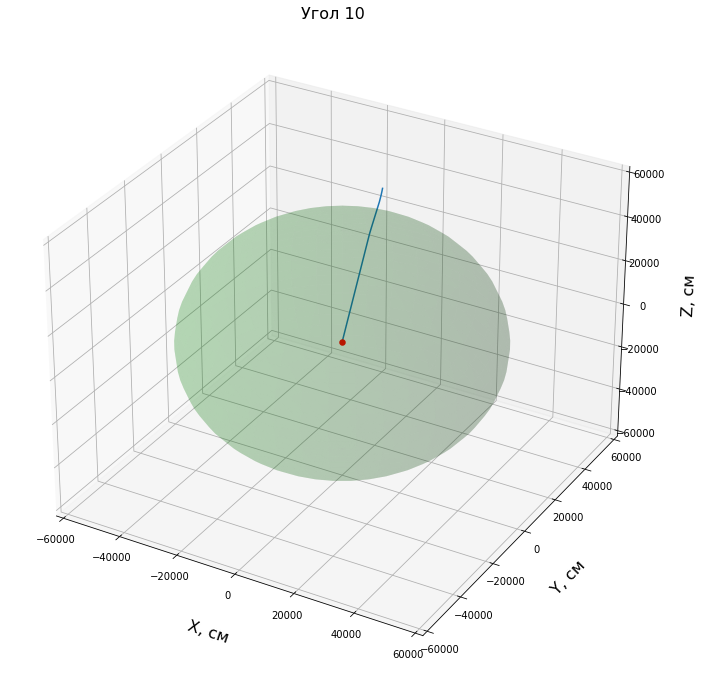

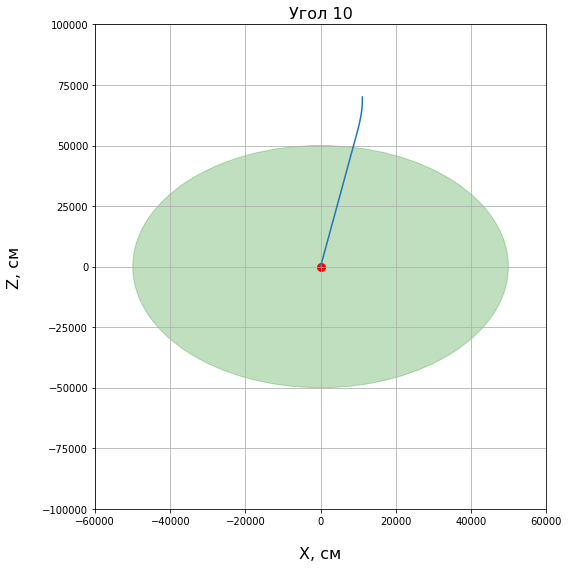

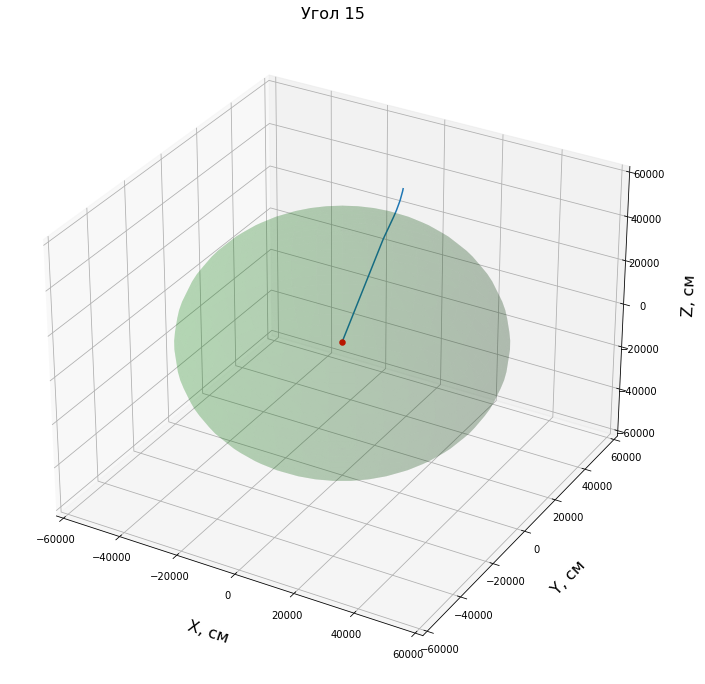

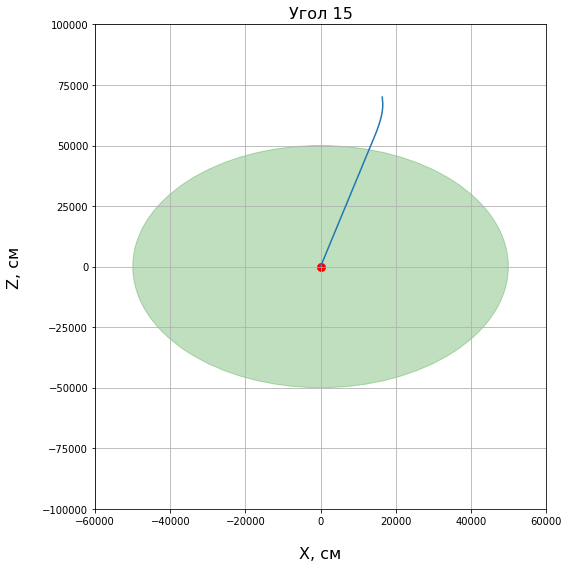

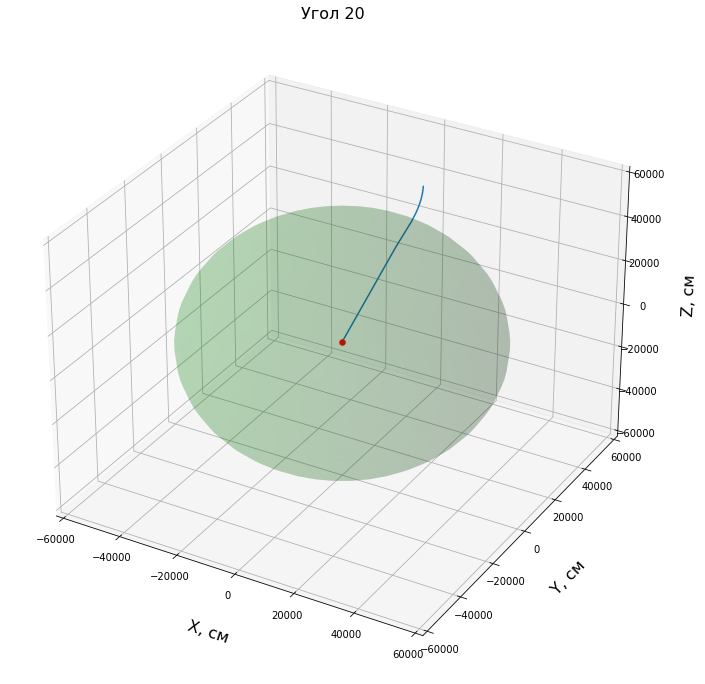

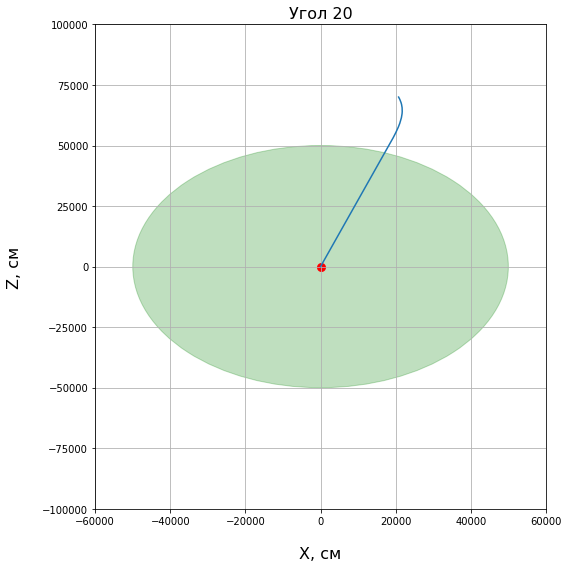

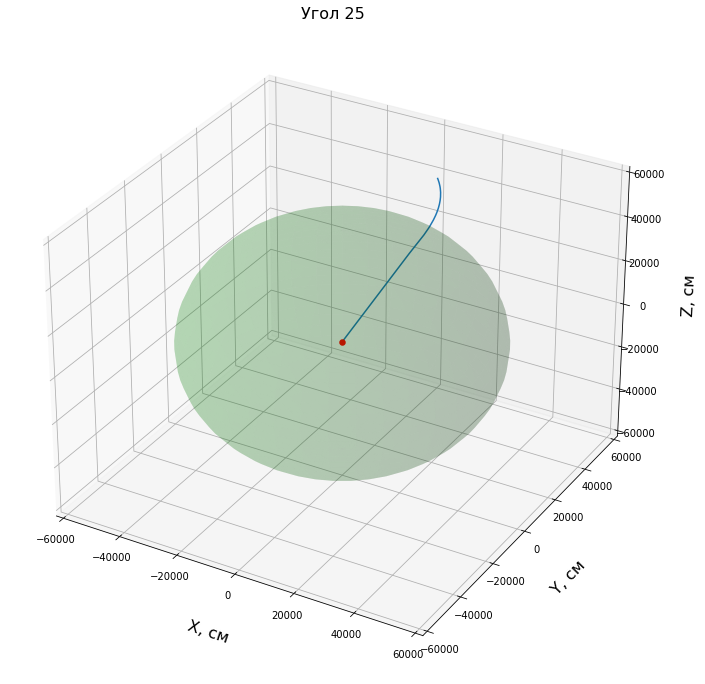

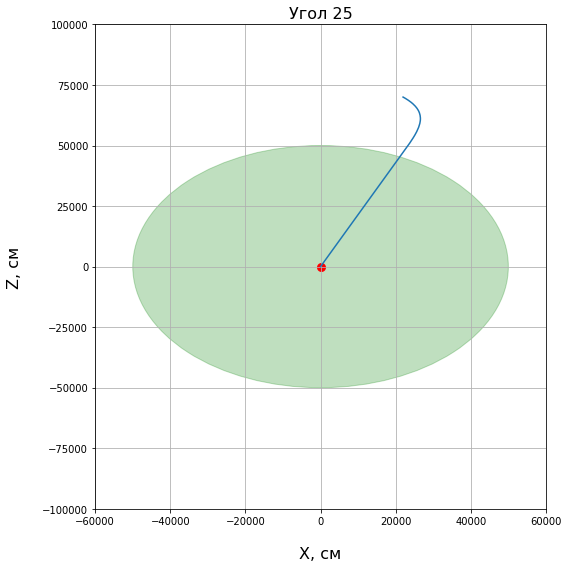

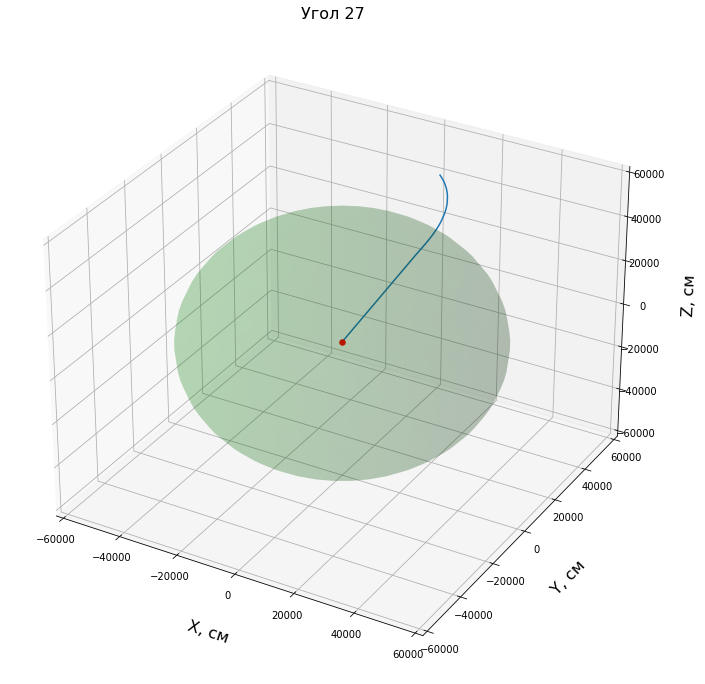

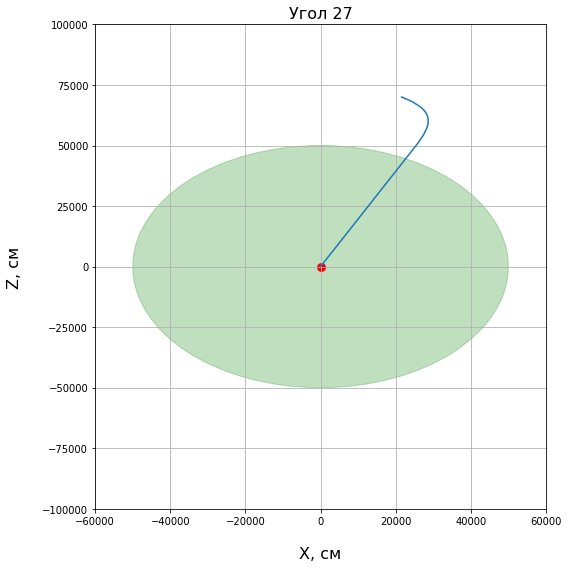

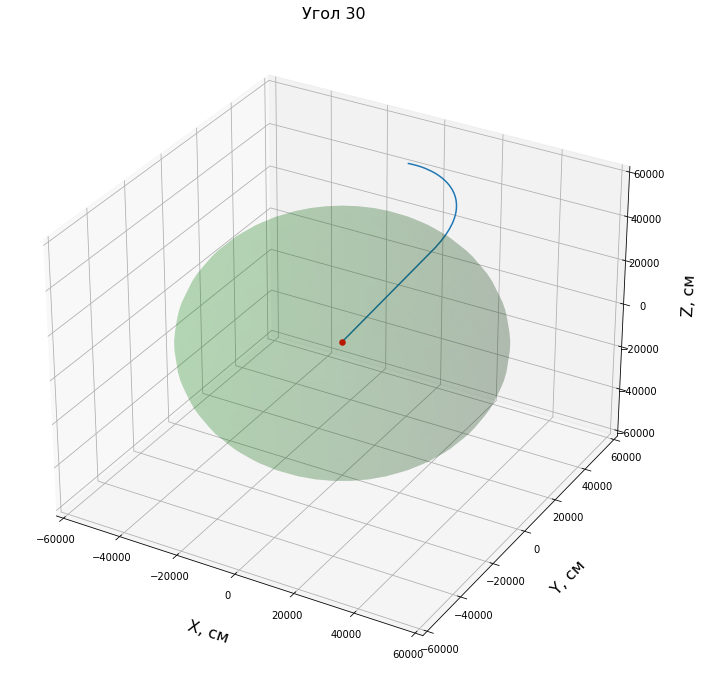

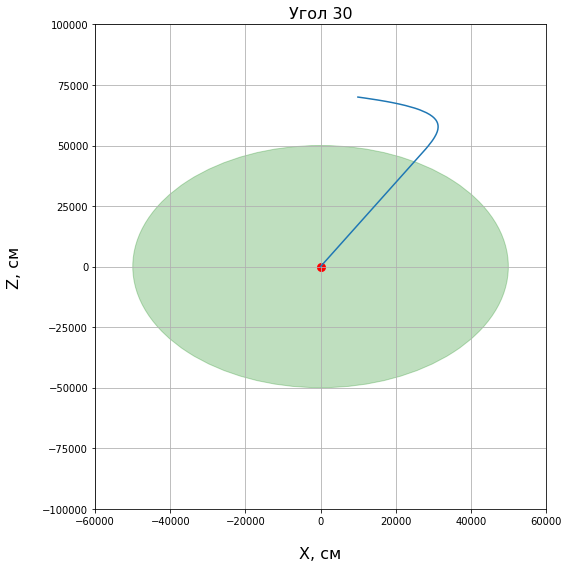

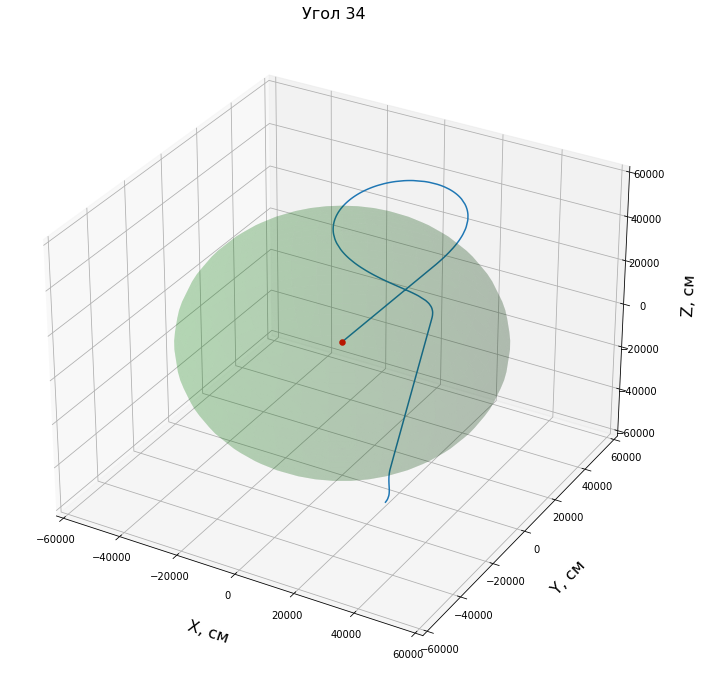

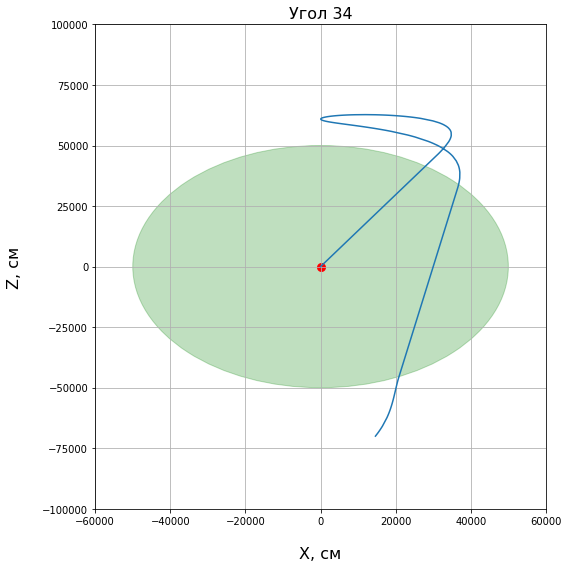

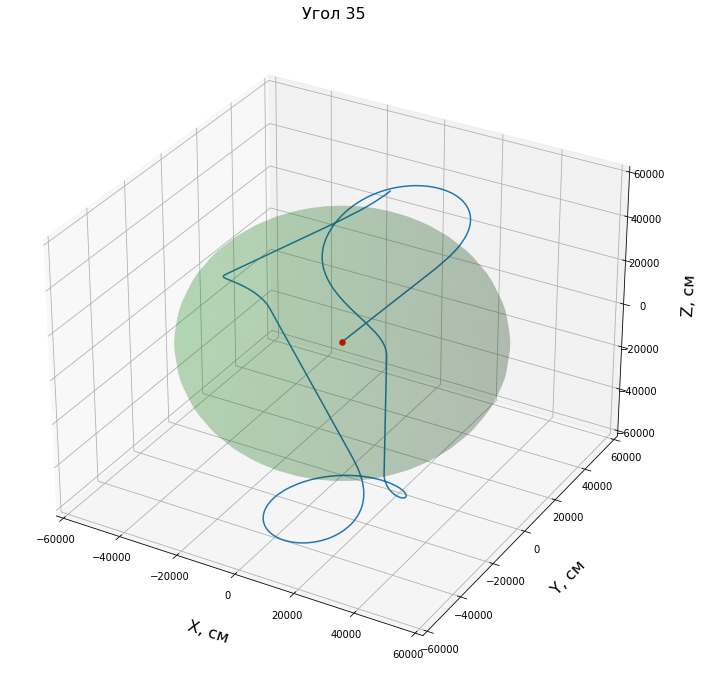

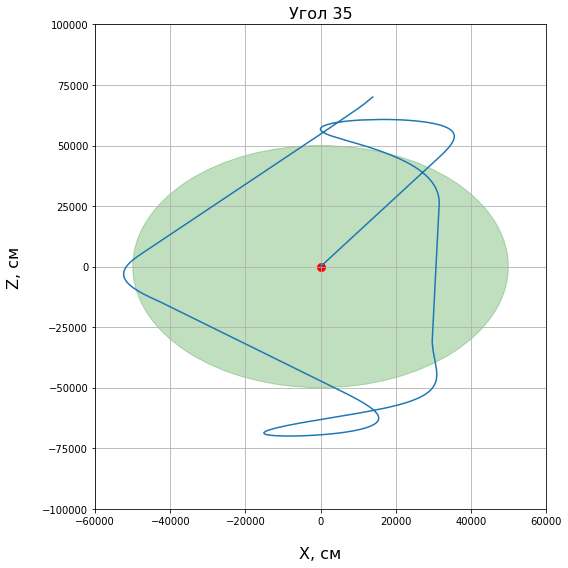

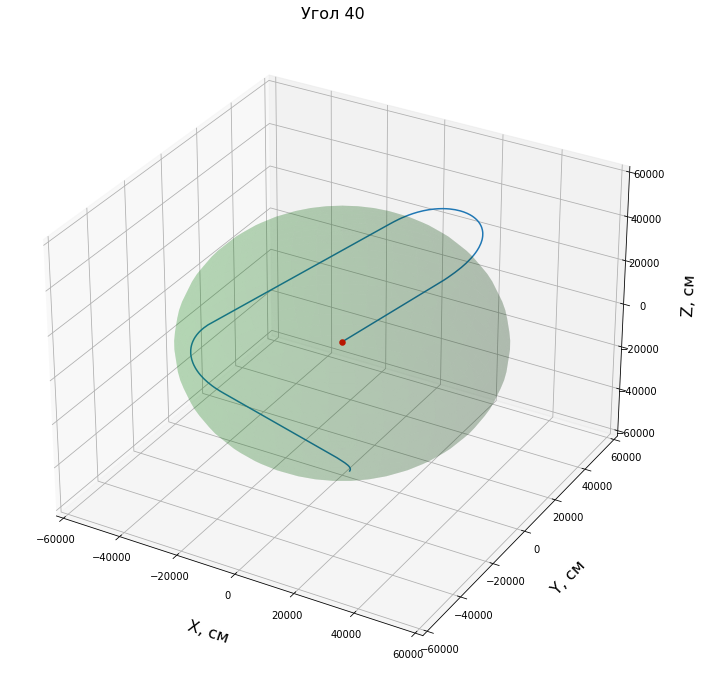

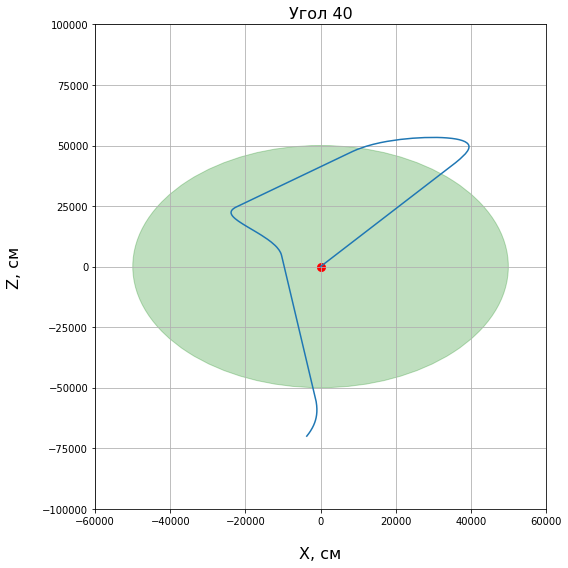

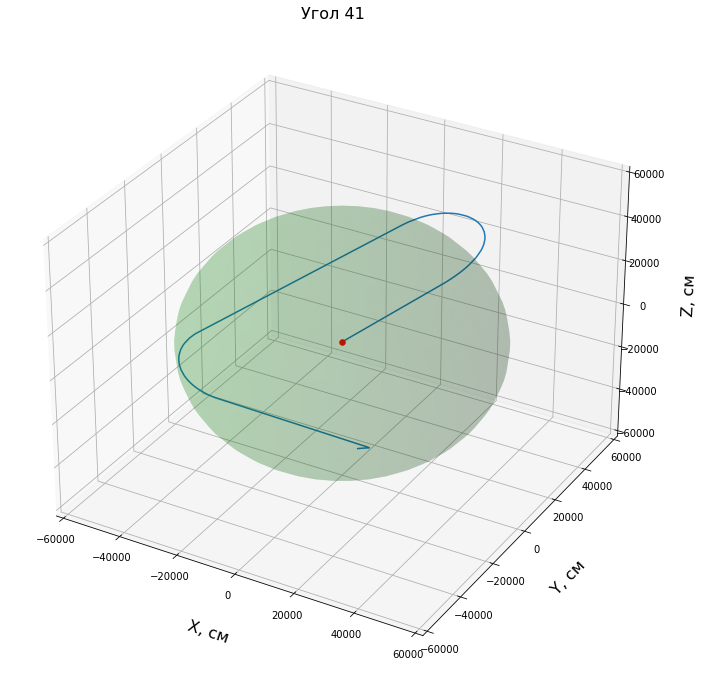

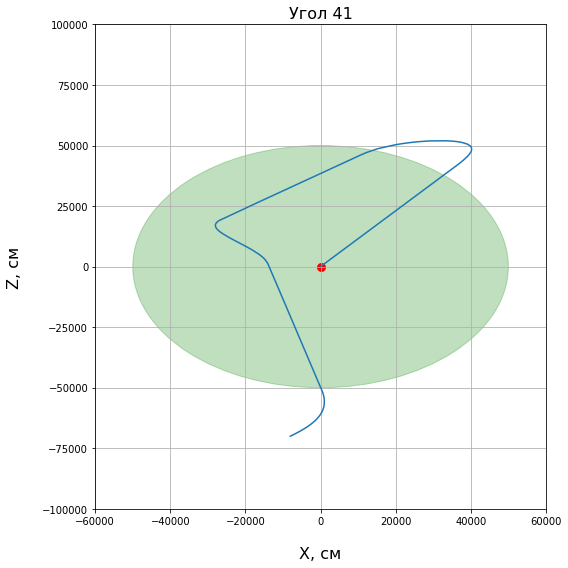

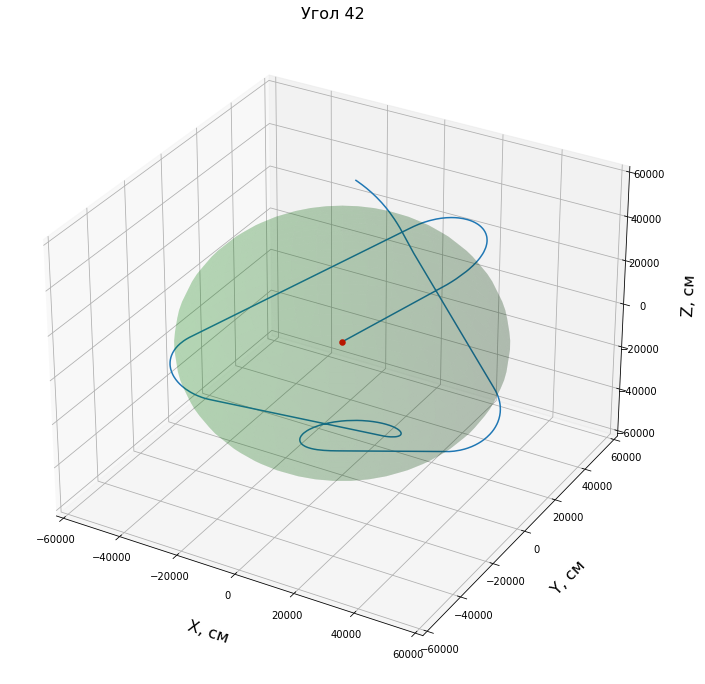

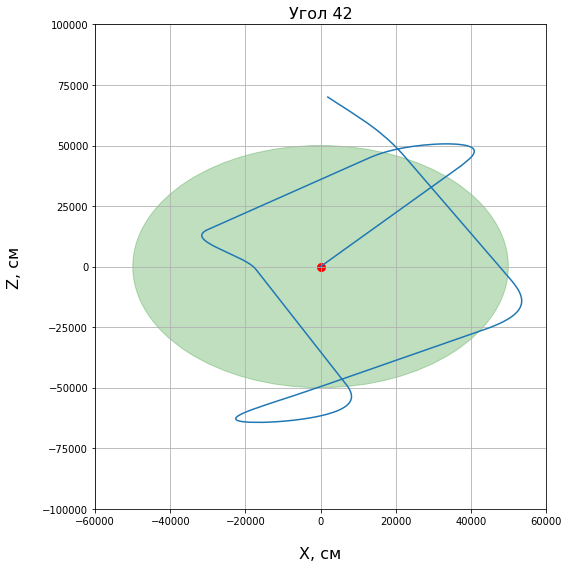

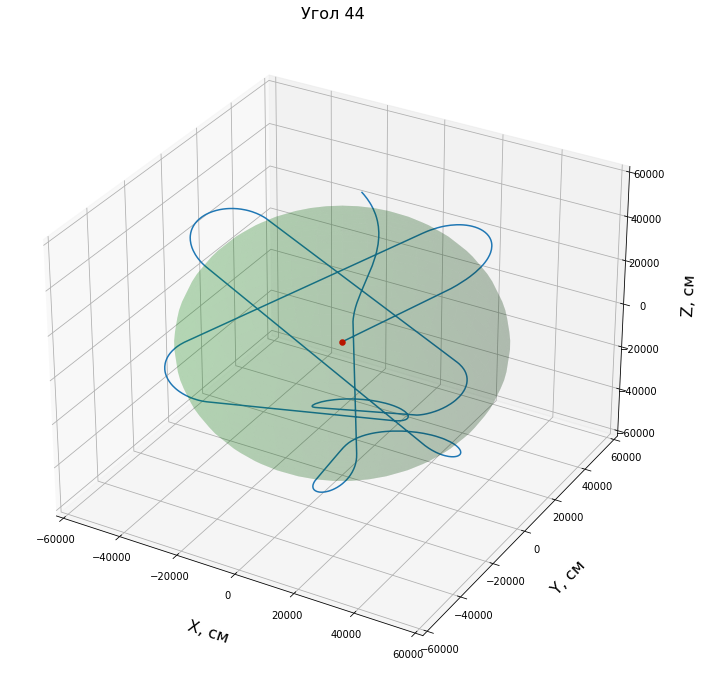

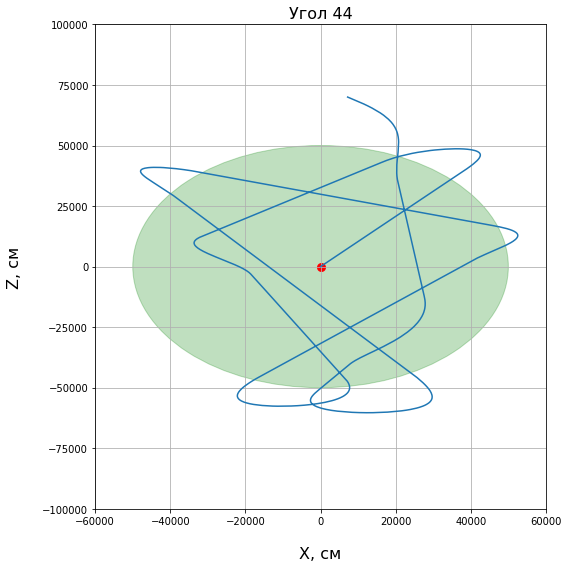

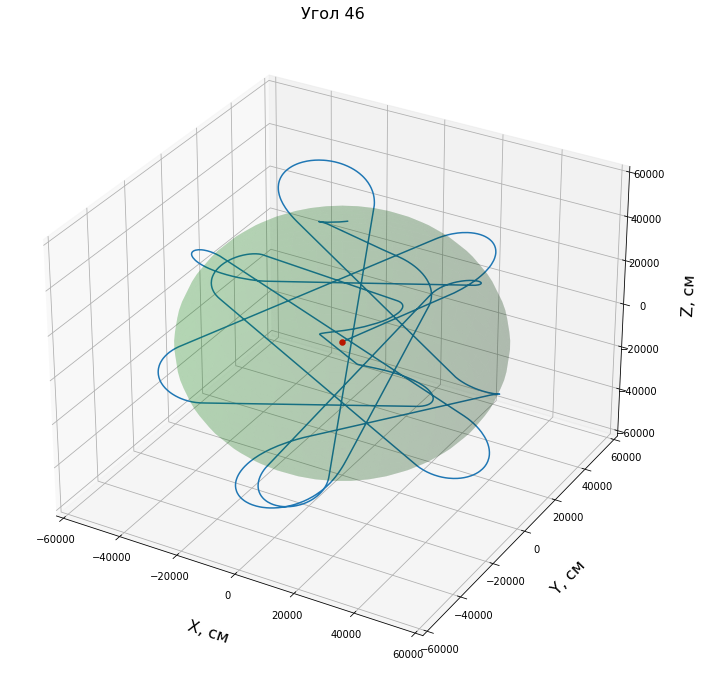

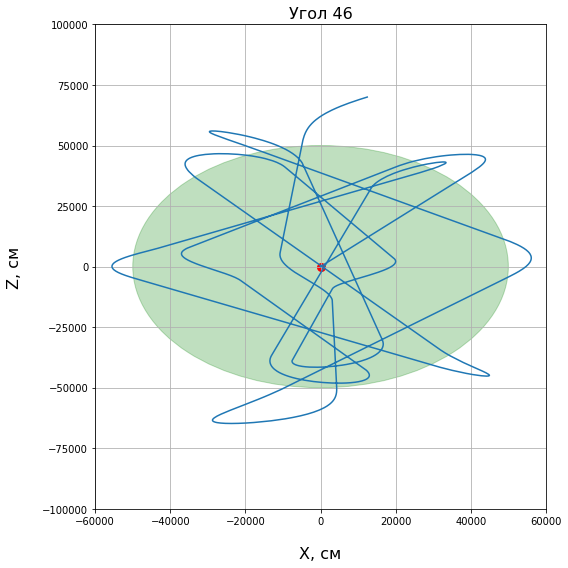

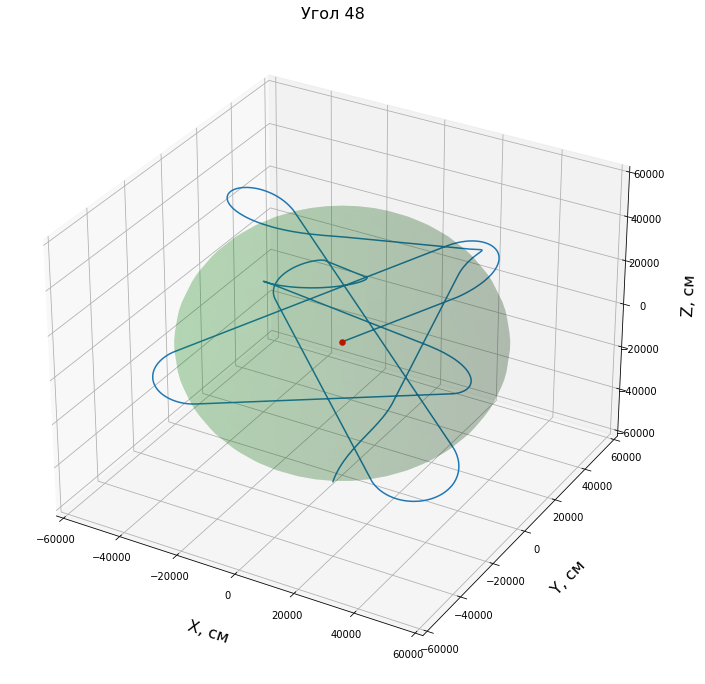

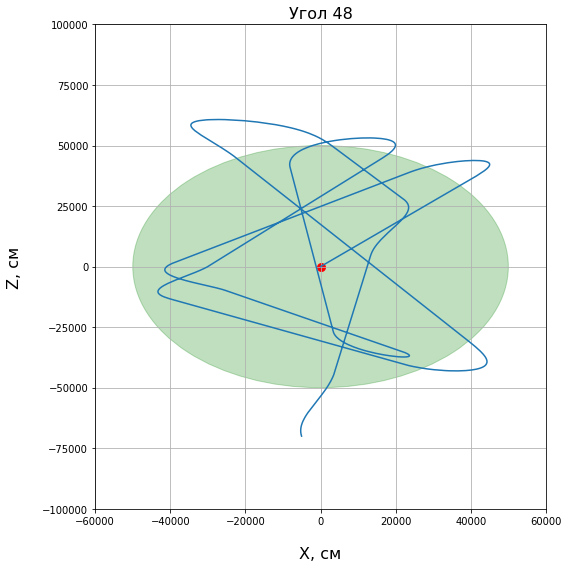

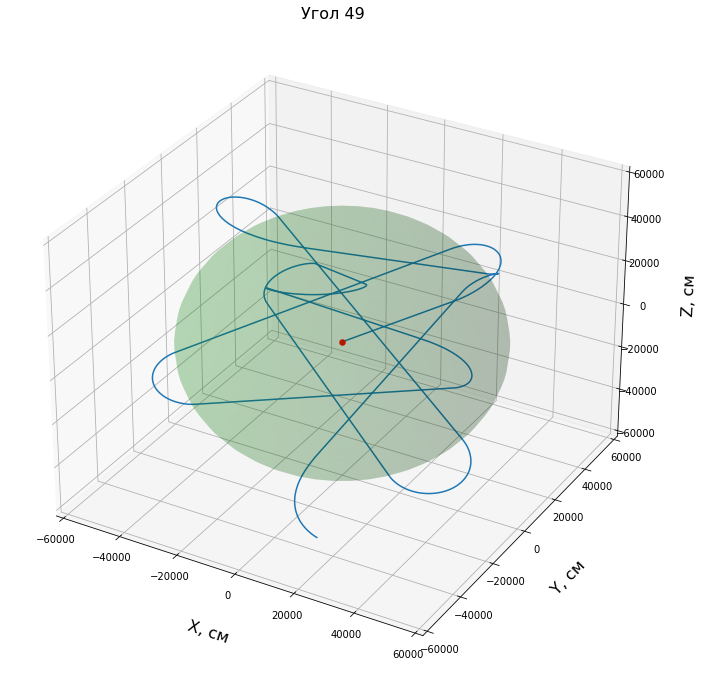

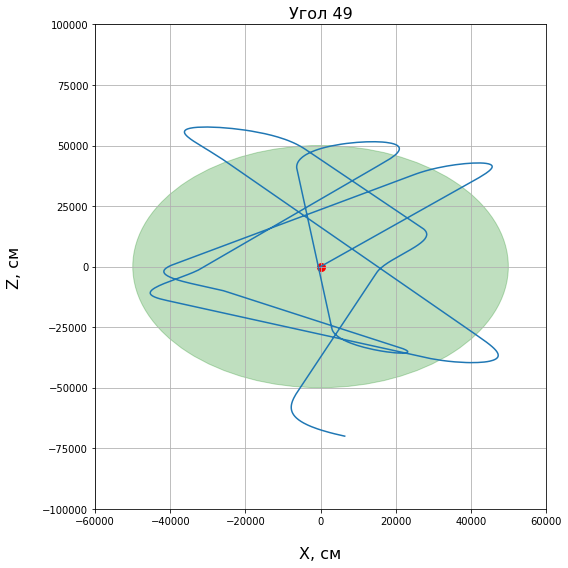

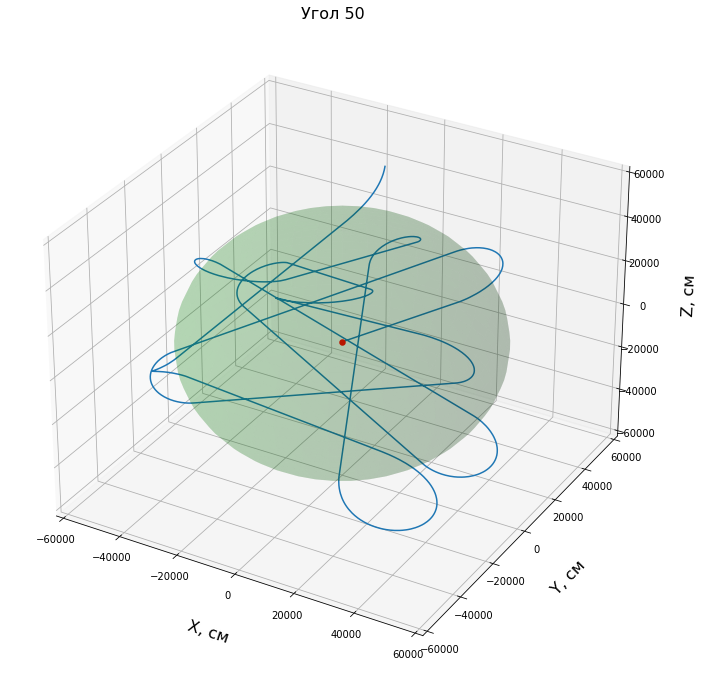

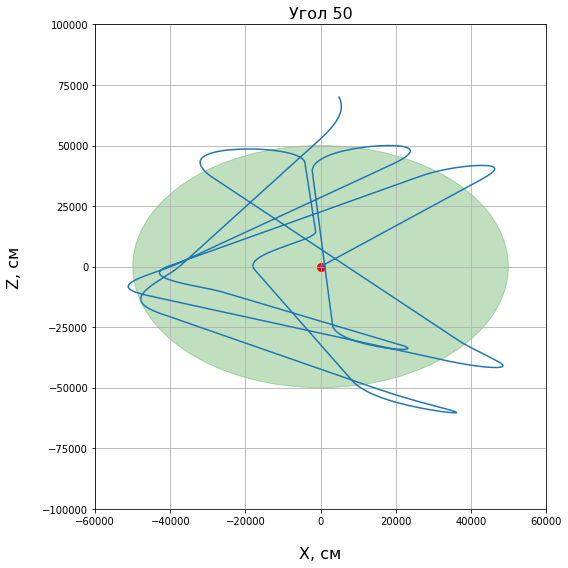

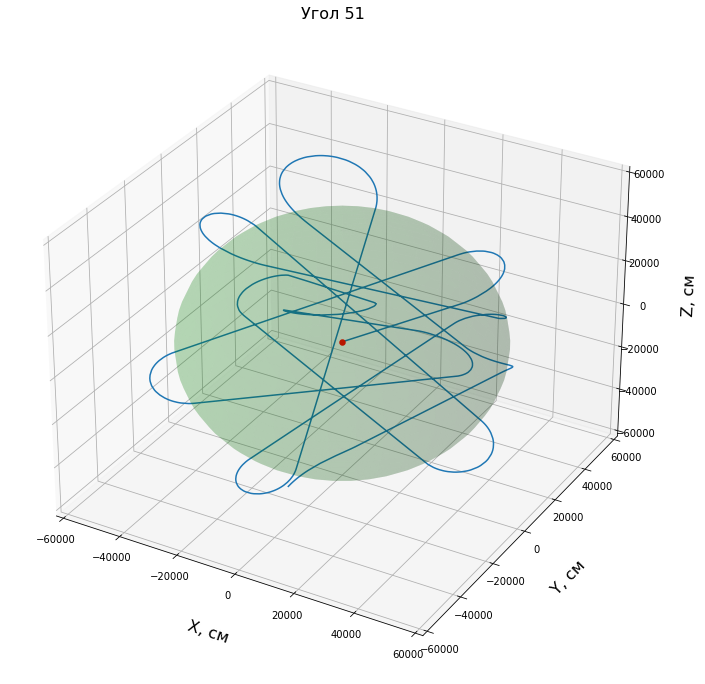

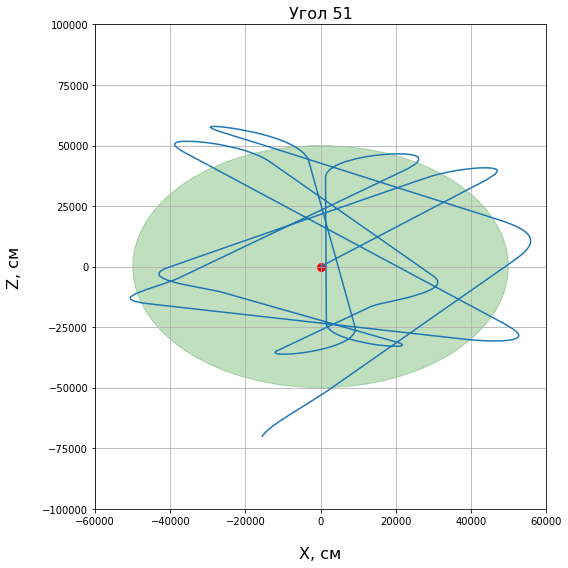

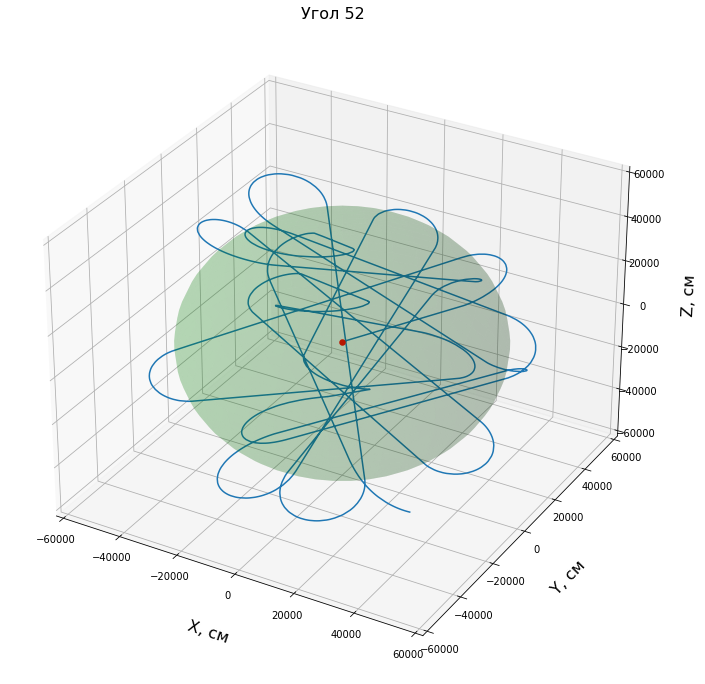

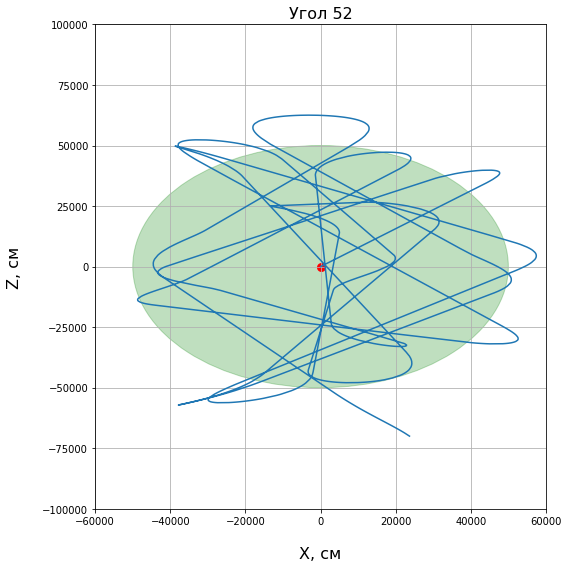

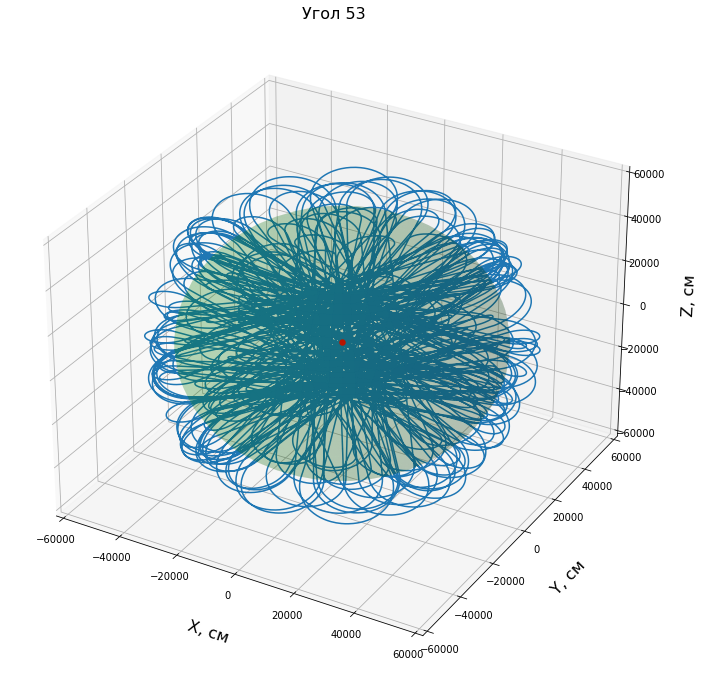

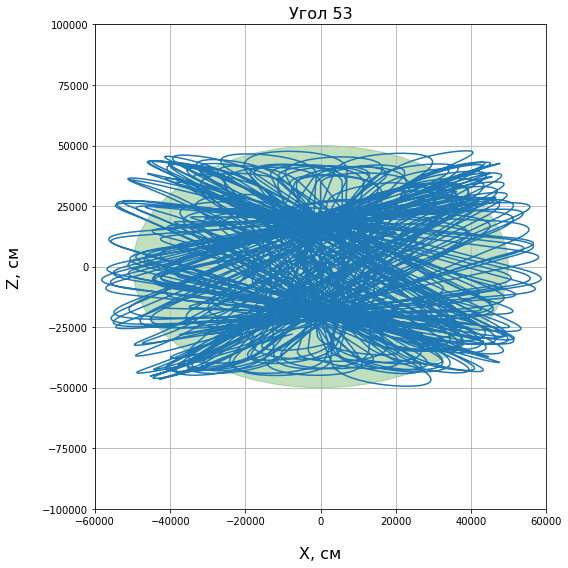

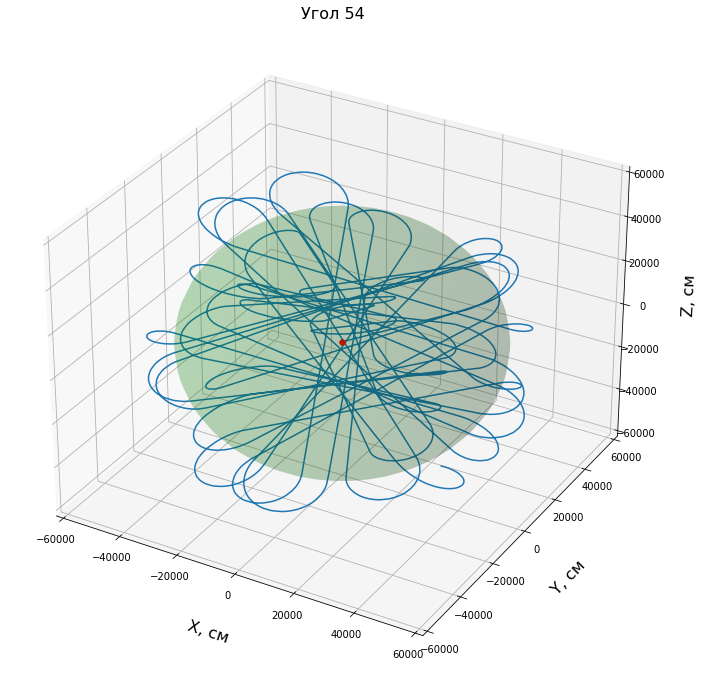

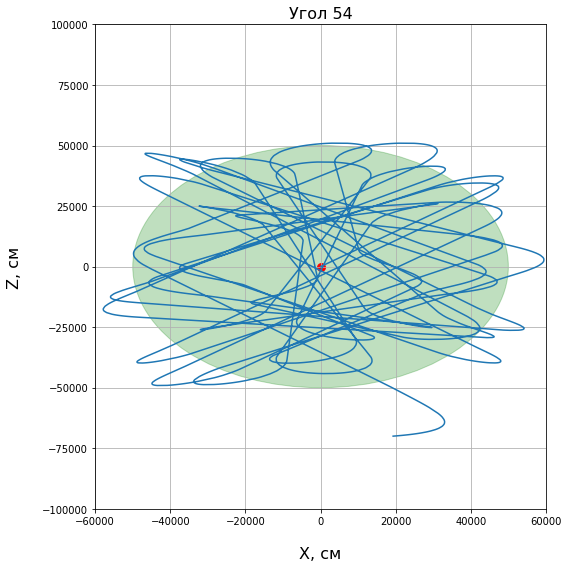

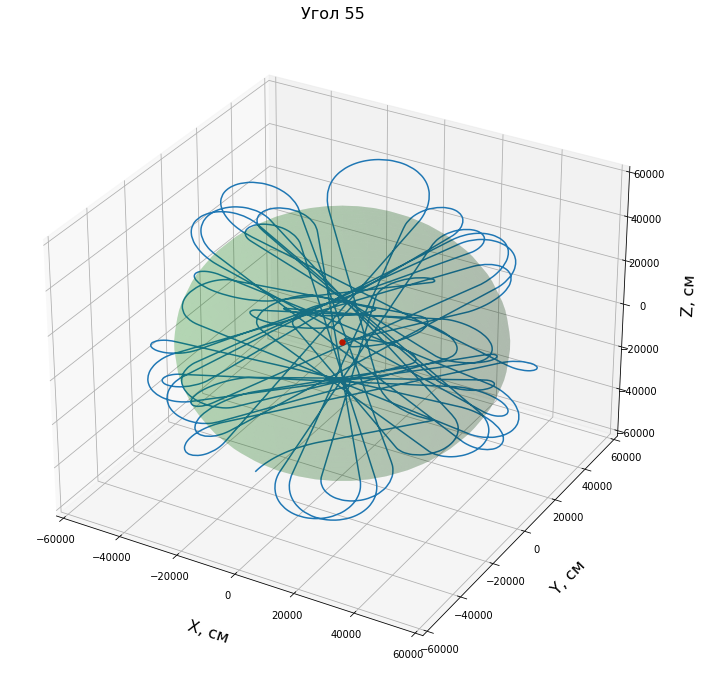

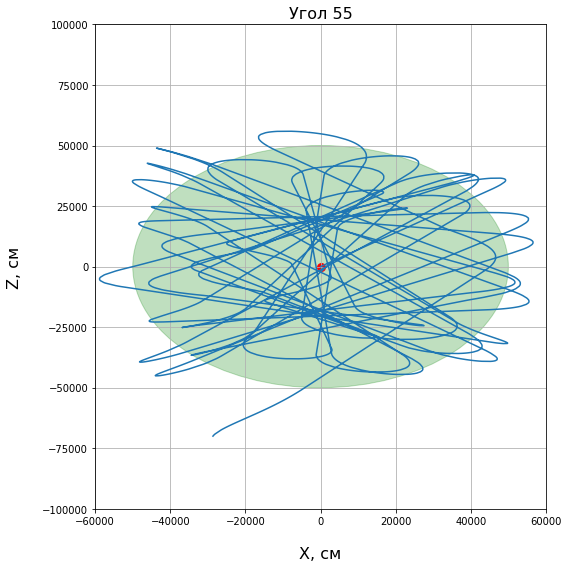

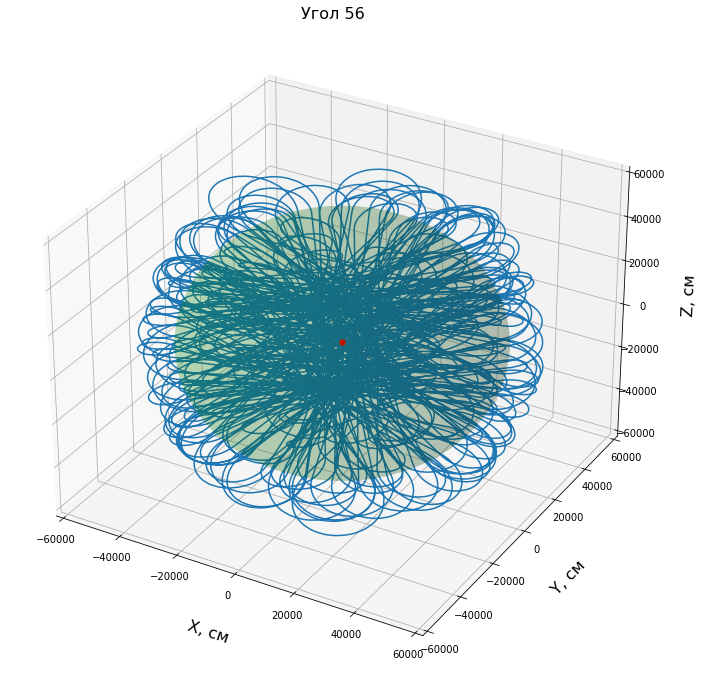

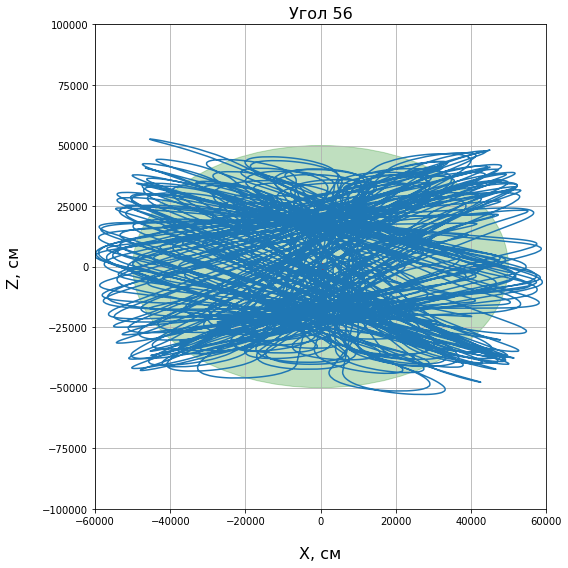

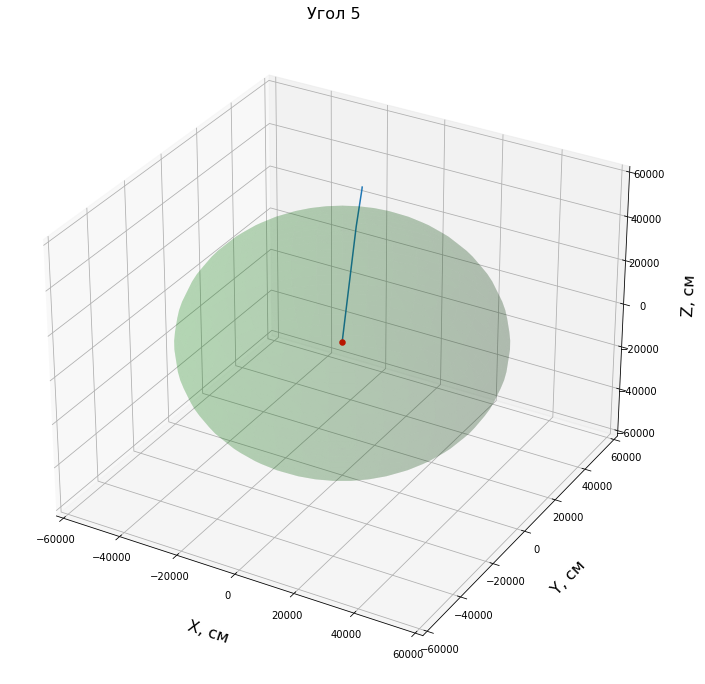

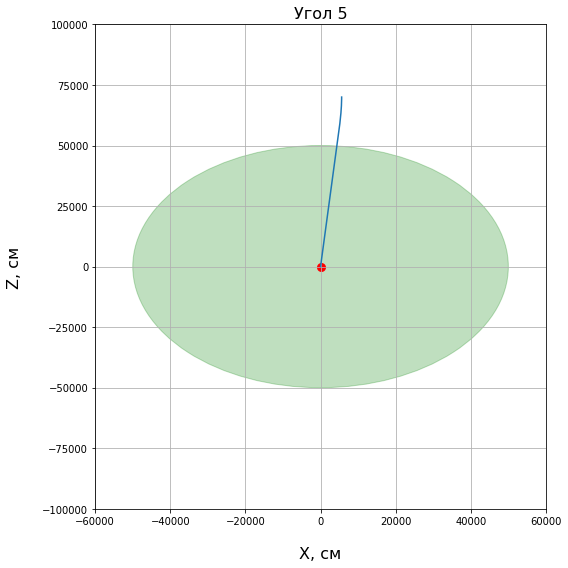

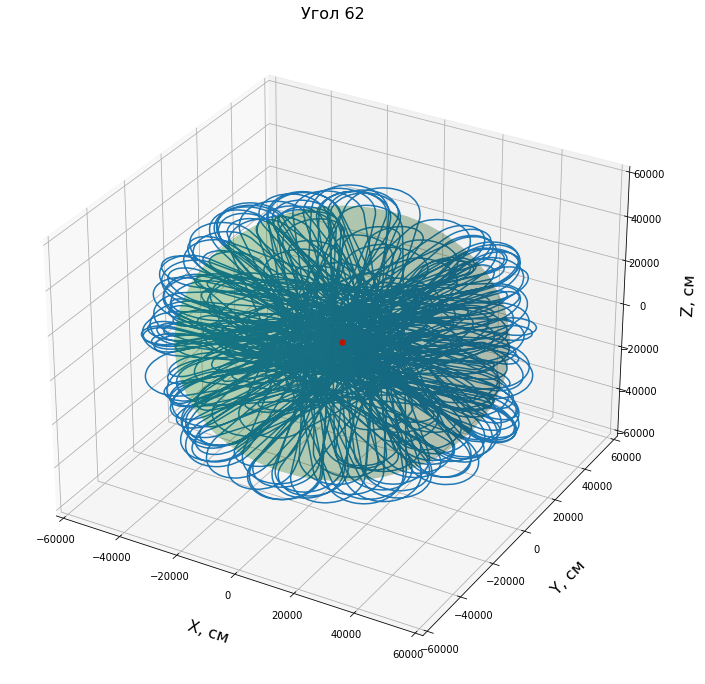

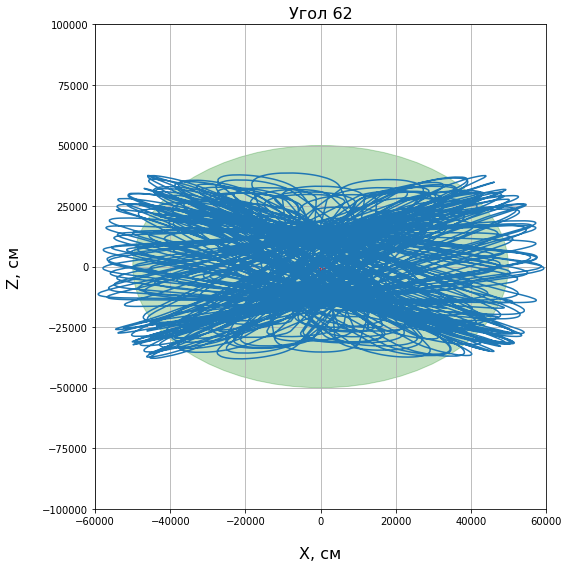

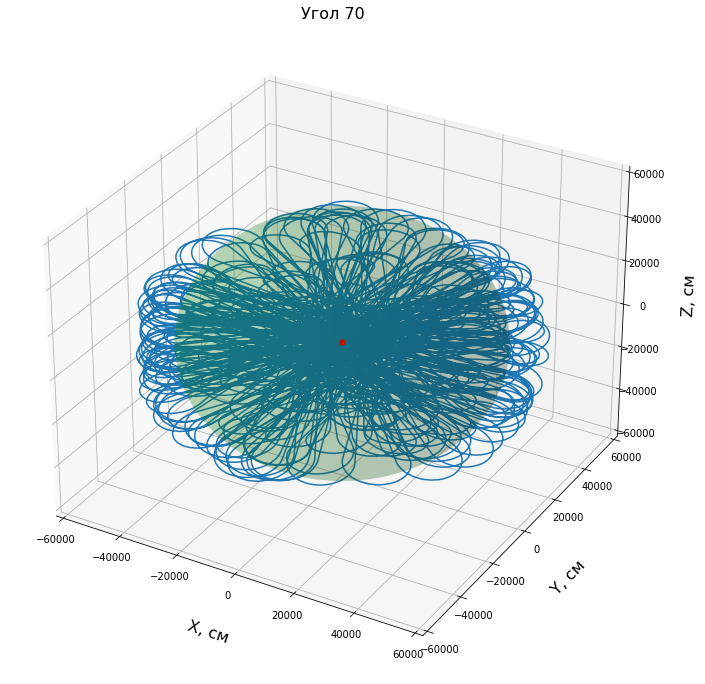

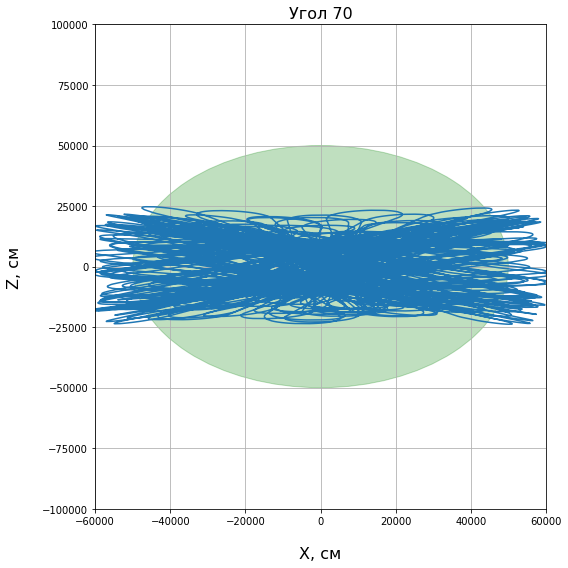

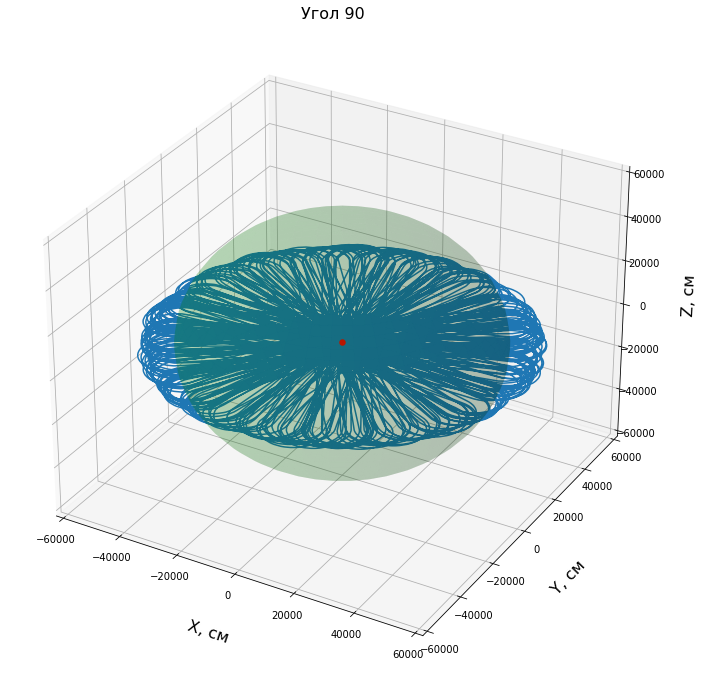

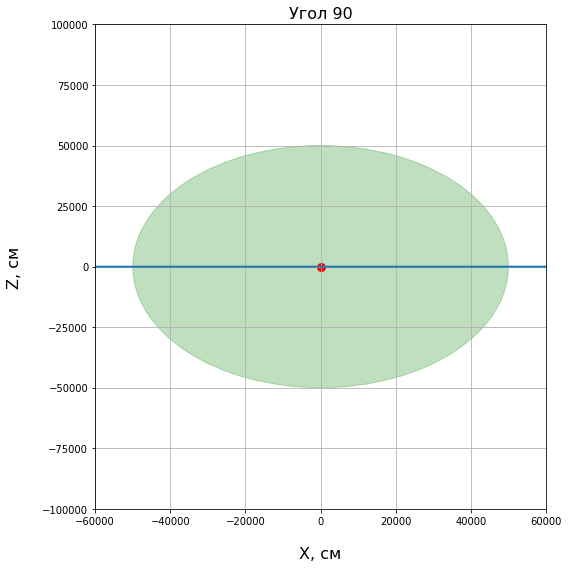

In [19]:
matplotlib.rcParams["axes.labelpad"] = 20.

for item in os.listdir(data_path):
    if item.endswith(f'_11'):
        a = int(item.split('_')[1])
        save_file(a)
        print(f'angle {a} saved')



In [ ]:
power = 11
data = dict()

pathes = [os.path.join(data_path, item) for item in os.listdir(data_path) if item.endswith(f'_{power}')]
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = executor.map(lambda p: read_file(*p), [(_path, 10) for _path in pathes])

    for angle, res in results:
        print(angle , "done")
        data[angle] = res


In [ ]:
matplotlib.rcParams["figure.figsize"] = [16, 9]
h = np.array([[key, np.max(data[key][:, 3])] for key in data.keys() if key < 40])
h1 = np.array([[key, np.max(data[key][:, 3])] for key in data.keys() if key >= 40])

fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.barh(h[:, 0], h[:, 1], align='center', height=3.)
ax2.barh(h1[:, 0], h1[:, 1], align='center', height=0.8)


ax2.set_yticks([i for i in range(40, 57)])

ax1.grid()
ax2.grid()
